#ЛР №7

Основные понятия ООП. Наследование. Полиморфизм.

#Основное задание




Написать базовый класс BaseProcessing, который предоствляет интерфейс для обработки данных (сигналы и изображения).

В классе BaseProcessing реализовать следующие абстрактные методы:

**Интерфейс BaseProcessing**

* `_filtering()` — осуществляет фильтрацию (абстрактный метод).
* `visualize()` — визуализирует сигнал/изображение (абстрактный метод).
* `get_shape()` — возвращает размерность (абстрактный метод).
* `feature_extraction()` — возвращает вектор признаков (абстрактный метод).


Класс SignalProcessing наследует BaseProcessing и переопределяет его методы

**Интерфейс SignalProcessing** (код для реализации отдельных методов ниже)

* _конструктор_ — принимает на вход путь к файлу и создает соответствующие поля
* `_filtering(signal)` — осуществляет фильтрацию сигнала (возвращает отфильтрованный сигнал).
* `visualize()` — визуализирует сигнал.
* `get_shape()` — возвращает длину сигнала.
* `_signal_find_peaks(signal, find_peaks_parametres)` — находит точки максимума сигнала и возвращает их в виде списка.
* `_calculate_RR_intervals()` — производит расчет длительности RR интервалов (попарных расстояний между пиками) и возвращает длины RR интервалов в виде списка.
В этом методе вызываются методы _filtering и _signal_find_peak.
* `feature_extraction()` — возвращает статистические характеристики RR интервалов на записи ECG - среднее, std, min, max (в виде списка - вектор признаков). В этом методе вызывается метод _calculate_RR_intervals.

Класс ImageProcessing наследует BaseProcessing и переопределяет его методы

**Интерфейс ImageProcessing** (код для реализации отдельных методов из предыдущей лабораторной)

* _конструктор_ — принимает на вход путь к файлу и создает соответствующие поля
* `_filtering(image)` — применяет фильтр Гаусса к изображению (возвращает отфильтрованное изображение).
* `visualize()` — визуализирует изображение.
* `get_shape()` — возвращает размерность изображения.
* `_create_gabor_filter(parameters)` — создает и возвращает фильтр Габора с заданными параметрами.
* `feature_extraction()` — применяет _filtering() к изображению, считает признаки с _create_gabor_filter(parameters)и возвращает вектор признаков: среднее и дисперсию по изображению.

*можно добавить свои методы


Изображение и синал находятся в папке

In [1]:
#Необходимые модули и функции
from skimage.filters import gabor_kernel
from scipy import ndimage as ndi
import cv2 as cv
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import wfdb
import heartpy as hp
from scipy.signal import find_peaks

C:\Users\1\AppData\Local\Temp\ipykernel_17440\4169227491.py:6: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter


## Интерфейс BaseProcessing

In [3]:
from abc import ABC, abstractmethod

# Базовый абстрактный класс для обработки данных
class BaseProcessing(ABC):
    @abstractmethod # Декоратор для обстрактных методов
    def _filtering(self):
        # Осуществляет фильтрацию данных.
        pass

    @abstractmethod
    def visualize(self):
        # Визуализирует данные
        pass

    @abstractmethod
    def get_shape(self):
        # Возвращает размер данных (длину сигнала или размер изображения).
        pass

    @abstractmethod
    def feature_extraction(self):
        # Извлекает признаки из данных и возвращает их.
        pass


## Интерфейс SignalProcessing

In [35]:
import pandas as pd
import numpy as np
import heartpy as hp
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

# Класс для обработки сигналов, наследующий базовый класс
class SignalProcessing(BaseProcessing):
    def __init__(self, filepath, parameters):
        self.filepath = filepath
        # Чтение сигнала из CSV
        self.signal_df = pd.read_csv(filepath, index_col='Unnamed: 0')['MLII']
        self.parameters = parameters
    
    def _filtering(self):
        # Фильтрация сигнала.
        filtered_signal = hp.filter_signal(self.signal_df, **self.parameters.get('filtration_parameters'))
        return filtered_signal
    
    def visualize(self):
        # Визуализация сигнала.
        plt.plot(self._filtering())
        plt.title("ECG Signal")
        plt.show()
    
    def get_shape(self):
        # Возвращает длину сигнала (количество точек данных).
        return len(self.signal_df)

    def _signal_find_peaks(self):
        # Находит пики (точки максимумов) в сигнале.
        peaks, _ = find_peaks(self._filtering(), **self.parameters.get('find_peaks_parameters'))
        return peaks

    def _calculate_RR_intervals(self):
        # Расчет интервалов RR на основе пиков.
        peaks = self._signal_find_peaks()
        rr_intervals = np.diff(peaks) / self.parameters['filtration_parameters']['sample_rate']
        return rr_intervals

    def feature_extraction(self):
        # Возвращает статистические характеристики RR интервалов.
        rr_intervals = self._calculate_RR_intervals()
        return [
            np.mean(rr_intervals), 
            np.std(rr_intervals), 
            np.min(rr_intervals), 
            np.max(rr_intervals)
        ]

In [41]:
filepath = 'C:\\Users\\1\\Desktop\\BMSTU\\Python\\ecg.csv'

parameters = {
            'filtration_parameters': {
                'cutoff': [0.75, 3.5], 
                'sample_rate': 100, 
                'order': 3, 
                'filtertype': 'bandpass'
            }, 
            'find_peaks_parameters': {
                'height': 20
            }
}

# Создаем экземпляр SignalProcessing
signal_processor = SignalProcessing(filepath=filepath, parameters=parameters)

In [45]:
signal_processor._filtering()

array([ 2.93669971,  3.29570764,  3.6720113 , ..., 46.85395203,
       40.8126148 , 34.54963788])

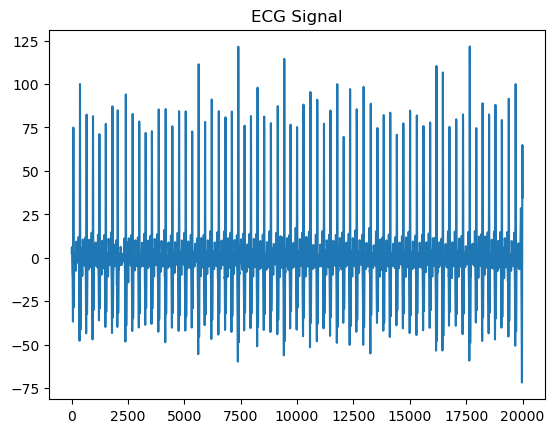

In [47]:
signal_processor.visualize()

In [49]:
signal_processor.get_shape()

20000

In [51]:
signal_processor._signal_find_peaks()

array([   77,   370,   663,   947,  1231,  1515,  1809,  2045,  2403,
        2706,  2998,  3283,  3560,  3863,  4171,  4466,  4765,  5060,
        5347,  5634,  5918,  6214,  6527,  6824,  7106,  7391,  7670,
        7953,  8246,  8539,  8837,  9141,  9431,  9710,  9998, 10282,
       10591, 10894, 11192, 11480, 11781, 12066, 12350, 12645, 12950,
       13267, 13562, 13842, 14131, 14423, 14711, 15011, 15310, 15607,
       15900, 16183, 16465, 16755, 17058, 17358, 17657, 17947, 18227,
       18514, 18796, 19081, 19388, 19693, 19926, 19992], dtype=int64)

In [53]:
signal_processor._calculate_RR_intervals()

array([2.93, 2.93, 2.84, 2.84, 2.84, 2.94, 2.36, 3.58, 3.03, 2.92, 2.85,
       2.77, 3.03, 3.08, 2.95, 2.99, 2.95, 2.87, 2.87, 2.84, 2.96, 3.13,
       2.97, 2.82, 2.85, 2.79, 2.83, 2.93, 2.93, 2.98, 3.04, 2.9 , 2.79,
       2.88, 2.84, 3.09, 3.03, 2.98, 2.88, 3.01, 2.85, 2.84, 2.95, 3.05,
       3.17, 2.95, 2.8 , 2.89, 2.92, 2.88, 3.  , 2.99, 2.97, 2.93, 2.83,
       2.82, 2.9 , 3.03, 3.  , 2.99, 2.9 , 2.8 , 2.87, 2.82, 2.85, 3.07,
       3.05, 2.33, 0.66])

In [55]:
signal_processor.feature_extraction()

[2.8862318840579713, 0.3107732359789018, 0.66, 3.58]

## Интерфейс ImageProcessing

In [95]:
import cv2  # OpenCV для обработки изображений
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import gabor

# Класс для обработки изображений, наследующий базовый класс
class ImageProcessing(BaseProcessing):
    def __init__(self, filepath, parameters):
        self.image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
        self.parameters = parameters
    
    def _filtering(self):
        # Применяет фильтр Гаусса к изображению."""
        image_filtered = ndi.gaussian_filter(self.image, .5)
        return image_filtered
    
    def visualize(self):
        # Визуализация изображения.
        plt.imshow(self._filtering())
        plt.title("Image")
        plt.show()
    
    def get_shape(self):
        # Возвращает размер изображения.
        return self.image.shape
    
    def _create_gabor_filter(self):
        # Создает и возвращает фильтр Габора.
        kernel = np.real(
            gabor_kernel(
                self.parameters['gabor_parameters']['frequency'], 
                theta=self.parameters['gabor_parameters']['theta'], 
                sigma_x=self.parameters['gabor_parameters']['sigma'], 
                sigma_y=self.parameters['gabor_parameters']['sigma']
            )
        )
        # plt.imshow(kernel)
        # plt.show()
        return kernel

    def feature_extraction(self):
        # Применяет фильтрацию и возвращает признаки (среднее и дисперсию).
        image_filtered = self._filtering()
        kernel = self._create_gabor_filter()
        conv = ndi.convolve(image_filtered, kernel, mode='wrap')
        plt.imshow(conv)
        plt.show()
        feats = [conv.mean(), conv.var()]
        return feats

In [97]:
filepath = 'C:\\Users\\1\\Desktop\\BMSTU\\Python\\chest-xray.tif'

parameters = {
            'gabor_parameters': {
                'frequency': 0.25, 
                'theta': np.pi, 
                'sigma': 1
            }
}

# Создаем экземпляр ImageProcessing
image_processor = ImageProcessing(
    filepath=filepath, 
    parameters=parameters
)

In [99]:
image_processor._filtering()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

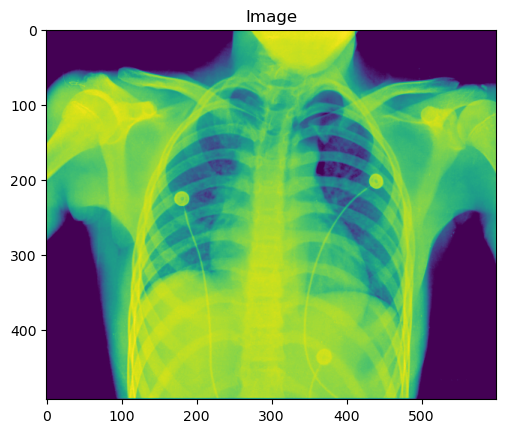

In [101]:
image_processor.visualize()

In [103]:
image_processor.get_shape()

(493, 600)

In [105]:
image_processor._create_gabor_filter()

array([[-2.10530060e-20, -2.39279779e-04,  5.41895496e-19,
         1.76805171e-03, -6.48682774e-19, -2.39279779e-04,
         1.38369167e-20],
       [-2.56478119e-19, -2.91502447e-03,  6.60163861e-18,
         2.15392793e-02, -5.00173146e-18, -2.91502447e-03,
         1.68568154e-19],
       [-1.96992564e-19, -1.30642333e-02,  1.65858174e-17,
         9.65323526e-02, -2.24162052e-17, -1.30642333e-02,
        -1.96992564e-19],
       [-3.24785830e-19, -2.15392793e-02,  5.91090183e-18,
         1.59154943e-01,  5.91090183e-18, -2.15392793e-02,
        -3.24785830e-19],
       [-1.96992564e-19, -1.30642333e-02, -2.24162052e-17,
         9.65323526e-02,  1.65858174e-17, -1.30642333e-02,
        -1.96992564e-19],
       [ 1.68568154e-19, -2.91502447e-03, -5.00173146e-18,
         2.15392793e-02,  6.60163861e-18, -2.91502447e-03,
        -2.56478119e-19],
       [ 1.38369167e-20, -2.39279779e-04, -6.48682774e-19,
         1.76805171e-03,  5.41895496e-19, -2.39279779e-04,
        -2.1053006

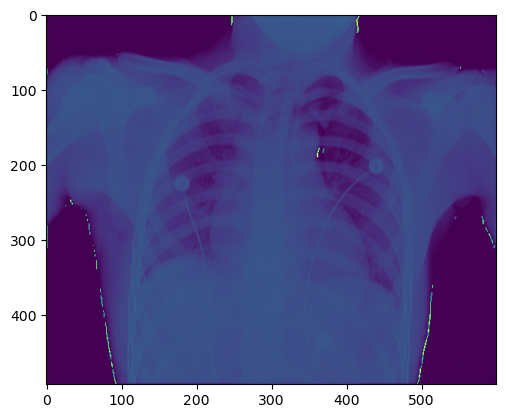

[41.113566599053414, 670.1179849805205]

In [107]:
image_processor.feature_extraction()